In [133]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import networkx as nx

# Functions

In [134]:
def create_neurons(G: nx.Graph, X: np.ndarray, m: int, n: int, verbose: bool = False) -> nx.Graph:

    X_min_x = min(X[:, 0])
    X_max_x = max(X[:, 0])

    X_min_y = min(X[:, 1])
    X_max_y = max(X[:, 1])

    if verbose:
        print(X_min_x, X_min_y)
        print(X_max_x, X_max_y)

    for i in range(m * n):

        pos_x = np.random.uniform(X_min_x, X_max_x)
        pos_y = np.random.uniform(X_min_y, X_max_y)

        if verbose:
            print(f"Add node {i} with pos = [{pos_x}, {pos_y}]")

        G.add_node(i, pos = [pos_x, pos_y])

    return G

In [135]:
def distancia_euclidiana(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    return np.sqrt(
        np.sum(
            (X - y) ** 2
            )
        )

In [136]:
def calc_distance_from_nodes(dot: np.ndarray) -> list:

    """Gets the distance from every node to the point and sorts by the closest"""

    distances = {}

    for n in G.nodes():

        distances[n] = distancia_euclidiana(G.nodes()[n]["pos"], dot)

    distances = sorted(distances.items(), key = lambda x: x[1])

    return distances

In [137]:
def funcao_vizinhanca(first, neighbor) -> np.ndarray:

    peso_first = G.nodes()[first]["pos"]
    peso_neighbor = G.nodes()[neighbor]["pos"]

    print(f"            Peso_first: {peso_first}")
    print(f"            Peso_neighbor: {peso_neighbor}")

    result = 1 / (1 + distancia_euclidiana(peso_first, peso_neighbor)) ** 2

    print(f"            Result = {result}")

    return result

In [138]:
def update_peso(first: int, dot: np.ndarray, lr0: float, sigma0: float) -> None:

    print(f"        Sigam0: {sigma0}"
          f"        lr0: {lr0}")

    peso_atual = G.nodes()[first]["pos"]

    print(f"        Peso_atual: {peso_atual}")

    # peso = peso_atual + aprendizado * funcao de vizinhanca * (dot - peso_atual)
    G.nodes()[first]["pos"] = peso_atual + lr0 * (dot - peso_atual)

    print(f"        Peso_novo: {G.nodes()[first]["pos"]}")

    # Get the sigma0 closest neighbors
    distances_from_best = calc_distance_from_nodes(G.nodes()[first]["pos"])

    neighbors_sigma0 = [n for n, _ in distances_from_best[:sigma0]]

    # Update weights for the neighbors, using funcao_vizinhanca
    for n in neighbors_sigma0:

        peso_atual = G.nodes()[n]["pos"]

        G.nodes()[n]["pos"] = peso_atual + lr0 * funcao_vizinhanca(first, n) * (dot - peso_atual)

        print("\n")

In [139]:
def plot_over_data(G, X, step=None):
    fig, ax = plt.subplots()

    # scatter points
    ax.scatter(X[:, 0], X[:, 1], s=2)

    # node positions
    pos = {i: G.nodes[i]["pos"] for i in G.nodes}

    # draw graph explicitly on this axis
    nx.draw_networkx(
        G, pos,
        ax=ax,
        with_labels=True,
        font_size=8,
        node_size=100,
        edgecolors='black'
    )

    # build title
    title = "SOM over Data"
    if step is not None:
        title += f" - {step} Steps"
    else:
        ax.set_axis_on()
        # ax.set_aspect("equal")
        ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

    # re-apply title and layout
    ax.set_title(title)
    fig.tight_layout()  # <- ensures title isn’t cut off
    plt.show()


In [140]:
# def som_train(X: np.ndarray, m: int, n: int, lr0: float, sigma0: float, steps: int, seed: int):
#
#     np.random.seed(seed)
#
#     raise NotImplementedError

# Data

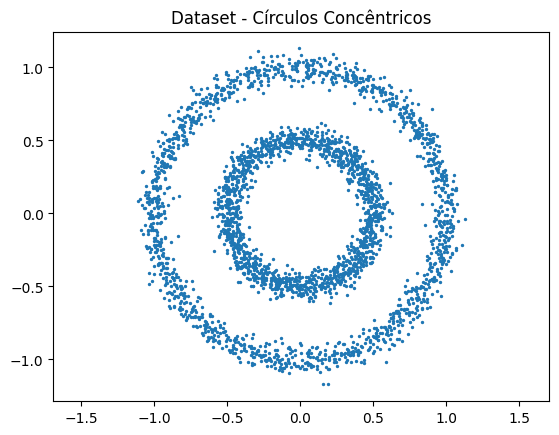

In [141]:
X, _ = make_circles(n_samples = 3000, factor = 0.5, noise = 0.05)
plt.scatter(X[:, 0], X[:, 1], s = 2)
plt.axis('equal')
plt.title("Dataset - Círculos Concêntricos")
plt.show()

# SOM

* Seleciona aleatoriamente um vetor x do conjunto X;
* Encontra o neurônio vencedor (BMU) — o mais próximo de x;
* Atualiza o BMU e seus vizinhos:

Wi,j(t + 1) = Wi,j(t) + n(t) hci(t) [X − Wi,j(t)]

onde:
* n(t)= taxa de aprendizado decaindo com o tempo (lr0);
* ℎci(t)= função de vizinhança Gaussiana com raio σ(t);
* Reduz gradualmente lr e σ a cada iteração (controlando o refinamento);
* Após steps iterações, o mapa se estabiliza — os neurônios formam uma malha que se ajusta à topologia dos dados.

In [142]:
# Parâmetros do algoritmo SOM

m, n = 10, 10
lr0 = 0.05
sigma0 = max(m, n) // 2
steps = 8000
seed = 11

# W = som_train(X, m, n, lr0, sigma0, steps, seed)

Step: 0
    Pos: 627
    Dot: [-0.80037223 -0.61111353]
    Best neuron: 28
        Sigam0: 5        lr0: 0.05
        Peso_atual: [-0.9137579165218237, -0.7205790848811524]
        Peso_novo: [-0.90808863 -0.71510581]
            Peso_first: [-0.90808863 -0.71510581]
            Peso_neighbor: [-0.90808863 -0.71510581]
            Result = 1.0


            Peso_first: [-0.90270281 -0.70990619]
            Peso_neighbor: [-0.7627329040258591, -0.8126327557654531]
            Result = 0.726012514522186


            Peso_first: [-0.90270281 -0.70990619]
            Peso_neighbor: [-0.996540707165884, -0.5302864245844953]
            Result = 0.6913823684448973


            Peso_first: [-0.90270281 -0.70990619]
            Peso_neighbor: [-0.7050159826232328, -0.7495346120932846]
            Result = 0.692573606999633


            Peso_first: [-0.90270281 -0.70990619]
            Peso_neighbor: [-1.0548241394848201, -0.9233666870177012]
            Result = 0.6277684831884105


Step: 

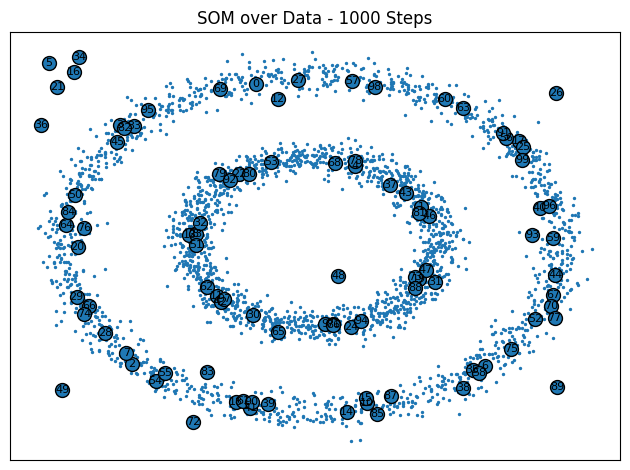

Step: 1000
    Pos: 1790
    Dot: [-0.44783888  0.31273695]
    Best neuron: 79
        Sigam0: 4        lr0: 0.0475
        Peso_atual: [-0.38152164  0.40508456]
        Peso_novo: [-0.38467171  0.40069805]
            Peso_first: [-0.38467171  0.40069805]
            Peso_neighbor: [-0.38467171  0.40069805]
            Result = 1.0


            Peso_first: [-0.38767215  0.39651989]
            Peso_neighbor: [-0.33767932  0.36973183]
            Result = 0.8955341329698424


            Peso_first: [-0.38767215  0.39651989]
            Peso_neighbor: [-0.30062193  0.40653935]
            Result = 0.8453599765682736


            Peso_first: [-0.38767215  0.39651989]
            Peso_neighbor: [-0.2601207   0.40545879]
            Result = 0.7861154139519354


Step: 1001
    Pos: 327
    Dot: [ 0.44468685 -0.18991846]
    Best neuron: 47
        Sigam0: 4        lr0: 0.0475
        Peso_atual: [ 0.45241147 -0.16202626]
        Peso_novo: [ 0.45204455 -0.16335114]
            Peso_fir

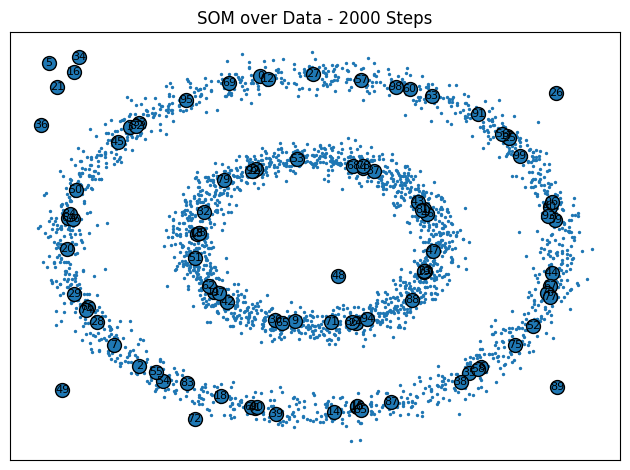

Step: 2000
    Pos: 1546
    Dot: [0.92927362 0.34406049]
    Best neuron: 96
        Sigam0: 4        lr0: 0.045125
        Peso_atual: [0.96157994 0.24027057]
        Peso_novo: [0.96012212 0.24495409]
            Peso_first: [0.96012212 0.24495409]
            Peso_neighbor: [0.96012212 0.24495409]
            Result = 1.0


            Peso_first: [0.95873008 0.24942627]
            Peso_neighbor: [0.9537346  0.21111531]
            Result = 0.9269874614266184


            Peso_first: [0.95873008 0.24942627]
            Peso_neighbor: [0.94655418 0.15599755]
            Result = 0.8352022754259746


            Peso_first: [0.95873008 0.24942627]
            Peso_neighbor: [0.97642871 0.13444032]
            Result = 0.8024296629324913


Step: 2001
    Pos: 649
    Dot: [-0.42720341  0.03618435]
    Best neuron: 23
        Sigam0: 4        lr0: 0.045125
        Peso_atual: [-0.46146264  0.05521937]
        Peso_novo: [-0.4599167   0.05436041]
            Peso_first: [-0.4599167   

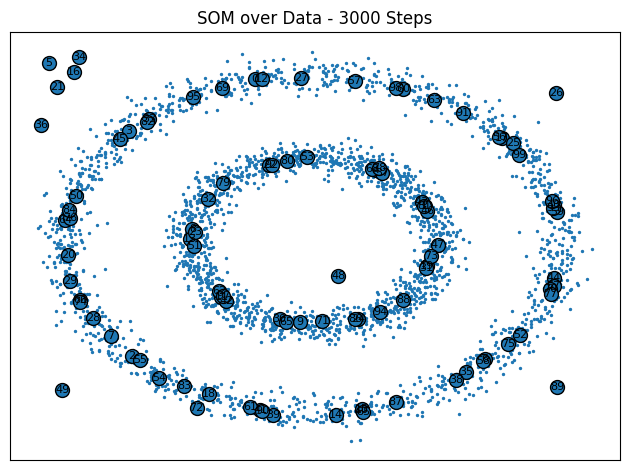

Step: 3000
    Pos: 1986
    Dot: [-0.03393365  0.99138283]
    Best neuron: 27
        Sigam0: 4        lr0: 0.04286875
        Peso_atual: [-0.05038327  0.97728952]
        Peso_novo: [-0.0496781   0.97789369]
            Peso_first: [-0.0496781   0.97789369]
            Peso_neighbor: [-0.0496781   0.97789369]
            Result = 1.0


            Peso_first: [-0.04900315  0.97847195]
            Peso_neighbor: [-0.20838538  0.97086773]
            Result = 0.74372248204979


            Peso_first: [-0.04900315  0.97847195]
            Peso_neighbor: [-0.23483185  0.96797511]
            Result = 0.7107864477644477


            Peso_first: [-0.04900315  0.97847195]
            Peso_neighbor: [0.16626768 0.95440497]
            Result = 0.6756096169622203


Step: 3001
    Pos: 2044
    Dot: [ 0.99878722 -0.34776033]
    Best neuron: 77
        Sigam0: 4        lr0: 0.04286875
        Peso_atual: [ 0.95715307 -0.30622266]
        Peso_novo: [ 0.95893788 -0.30800332]
            Pes

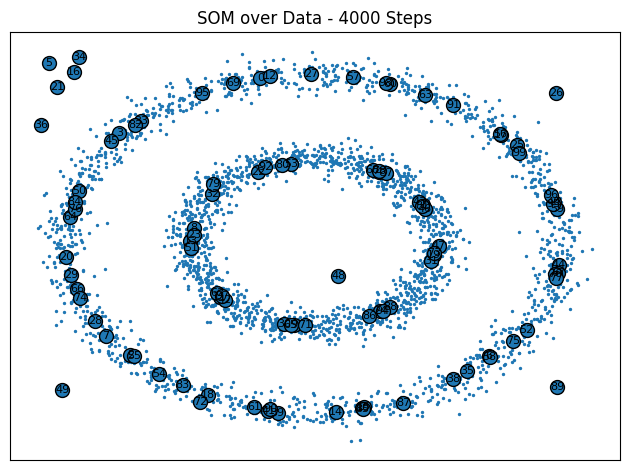

Step: 4000
    Pos: 2536
    Dot: [-0.95741364 -0.1753174 ]
    Best neuron: 29
        Sigam0: 4        lr0: 0.04072531249999999
        Peso_atual: [-0.9757373  -0.18967068]
        Peso_novo: [-0.97499106 -0.18908614]
            Peso_first: [-0.97499106 -0.18908614]
            Peso_neighbor: [-0.97499106 -0.18908614]
            Result = 1.0


            Peso_first: [-0.97427521 -0.1885254 ]
            Peso_neighbor: [-0.95145372 -0.27551088]
            Result = 0.8417890685005558


            Peso_first: [-0.97427521 -0.1885254 ]
            Peso_neighbor: [-0.99689682 -0.08420282]
            Result = 0.8164004529057454


            Peso_first: [-0.97427521 -0.1885254 ]
            Peso_neighbor: [-0.9402629  -0.32941447]
            Result = 0.762846668954543


Step: 4001
    Pos: 894
    Dot: [0.53842894 0.71840217]
    Best neuron: 91
        Sigam0: 4        lr0: 0.04072531249999999
        Peso_atual: [0.56506196 0.81359487]
        Peso_novo: [0.56397732 0.80971811]
 

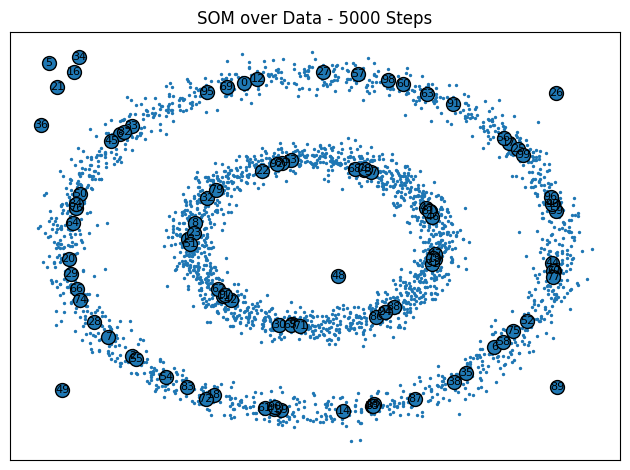

Step: 5000
    Pos: 2764
    Dot: [0.16378634 0.49358033]
    Best neuron: 68
        Sigam0: 4        lr0: 0.038689046874999994
        Peso_atual: [0.16608368 0.4349968 ]
        Peso_novo: [0.1659948  0.43726334]
            Peso_first: [0.1659948  0.43726334]
            Peso_neighbor: [0.1659948  0.43726334]
            Result = 1.0


            Peso_first: [0.16590936 0.43944219]
            Peso_neighbor: [0.20638881 0.43818922]
            Result = 0.9236699183689123


            Peso_first: [0.16590936 0.43944219]
            Peso_neighbor: [0.20579651 0.42996669]
            Result = 0.9227857536798888


            Peso_first: [0.16590936 0.43944219]
            Peso_neighbor: [0.23346276 0.41860428]
            Result = 0.8723063563843166


Step: 5001
    Pos: 336
    Dot: [0.150445   0.46671794]
    Best neuron: 68
        Sigam0: 4        lr0: 0.038689046874999994
        Peso_atual: [0.16590936 0.43944219]
        Peso_novo: [0.16531106 0.44049747]
            Peso_fir

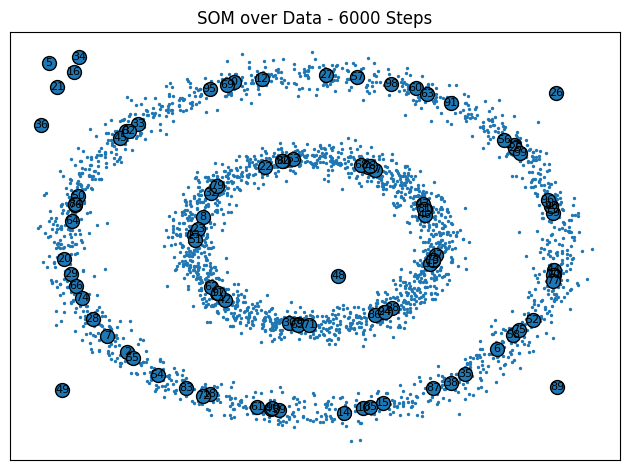

Step: 6000
    Pos: 2589
    Dot: [-0.45189146 -0.06164476]
    Best neuron: 51
        Sigam0: 4        lr0: 0.03675459453124999
        Peso_atual: [-0.47734259  0.0132877 ]
        Peso_novo: [-0.47640714  0.01053359]
            Peso_first: [-0.47640714  0.01053359]
            Peso_neighbor: [-0.47640714  0.01053359]
            Result = 1.0


            Peso_first: [-0.47550608  0.0078807 ]
            Peso_neighbor: [-0.48088686  0.04295798]
            Result = 0.9326317783838926


            Peso_first: [-0.47550608  0.0078807 ]
            Peso_neighbor: [-0.46438562  0.08168806]
            Result = 0.8659118191258918


            Peso_first: [-0.47550608  0.0078807 ]
            Peso_neighbor: [-0.44462602  0.15334114]
            Result = 0.7578533368567463


Step: 6001
    Pos: 1301
    Dot: [ 0.5203438  -0.01531122]
    Best neuron: 47
        Sigam0: 4        lr0: 0.03675459453124999
        Peso_atual: [ 0.49654697 -0.0732821 ]
        Peso_novo: [ 0.49742161 -0.071

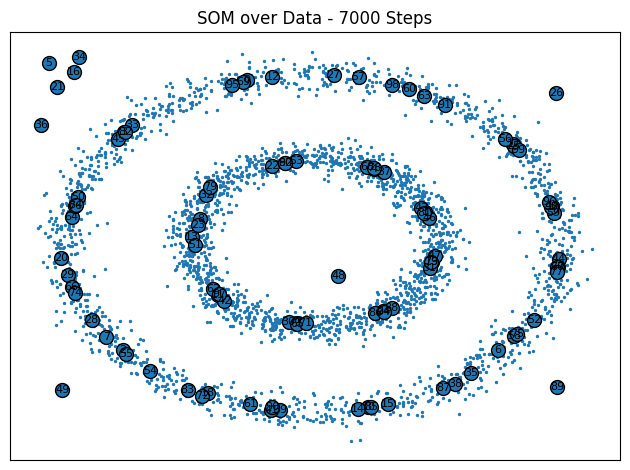

Step: 7000
    Pos: 1996
    Dot: [ 0.2924031  -0.33254176]
    Best neuron: 88
        Sigam0: 4        lr0: 0.03491686480468749
        Peso_atual: [ 0.31602166 -0.38608054]
        Peso_novo: [ 0.31519698 -0.38421114]
            Peso_first: [ 0.31519698 -0.38421114]
            Peso_neighbor: [ 0.31519698 -0.38421114]
            Result = 1.0


            Peso_first: [ 0.31440109 -0.382407  ]
            Peso_neighbor: [ 0.2804881  -0.40662434]
            Result = 0.9215902599272173


            Peso_first: [ 0.31440109 -0.382407  ]
            Peso_neighbor: [ 0.28330444 -0.41275389]
            Result = 0.9184518660640122


            Peso_first: [ 0.31440109 -0.382407  ]
            Peso_neighbor: [ 0.24834939 -0.41739592]
            Result = 0.8657407477020669


Step: 7001
    Pos: 1215
    Dot: [ 0.67762404 -0.85734375]
    Best neuron: 35
        Sigam0: 4        lr0: 0.03491686480468749
        Peso_atual: [ 0.63475088 -0.77256844]
        Peso_novo: [ 0.63624788 -0.775

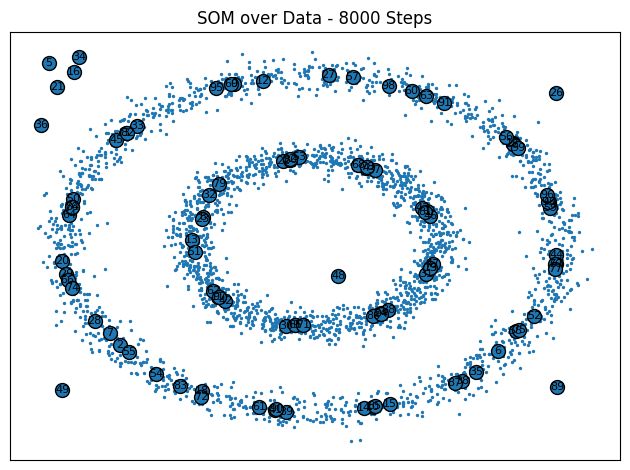

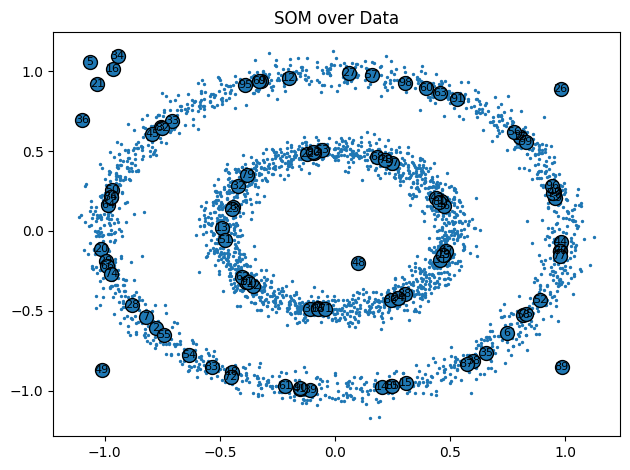

In [143]:
np.random.seed(42)

G = nx.Graph()

G = create_neurons(G, X, m, n)

step = 0

while step < steps:

    print(f"Step: {step}")

    pos = np.random.randint(X.shape[0])

    print(f"    Pos: {pos}")

    dot = X[pos]

    print(f"    Dot: {dot}")

    distances = calc_distance_from_nodes(dot)

    best_neuron = distances[0][0]

    print(f"    Best neuron: {best_neuron}")

    update_peso(best_neuron, dot, lr0, sigma0)

    step += 1

    if step % 1000 == 0:
        print(f"Step {step}")
        lr0 *= 0.95   # decay 5%
        sigma0 *= 0.9 # decay 10%
        sigma0 = round(sigma0)
        plot_over_data(G, X, step)


plot_over_data(G, X)